# The downloaded model - Paper Scbasset
**(we use weight of model download from scbasset github. The atac and rna data are also from scbasset github)**

['/home/ubuntu0/scBasset/tutorial', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python37.zip', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/lib-dynload', '', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/site-packages', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/site-packages/IPython/extensions', '/home/ubuntu0/.ipython']


2024-03-10 04:35:42.229525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 04:35:43.318759: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 04:35:43.730307: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 04:35:45.224364: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

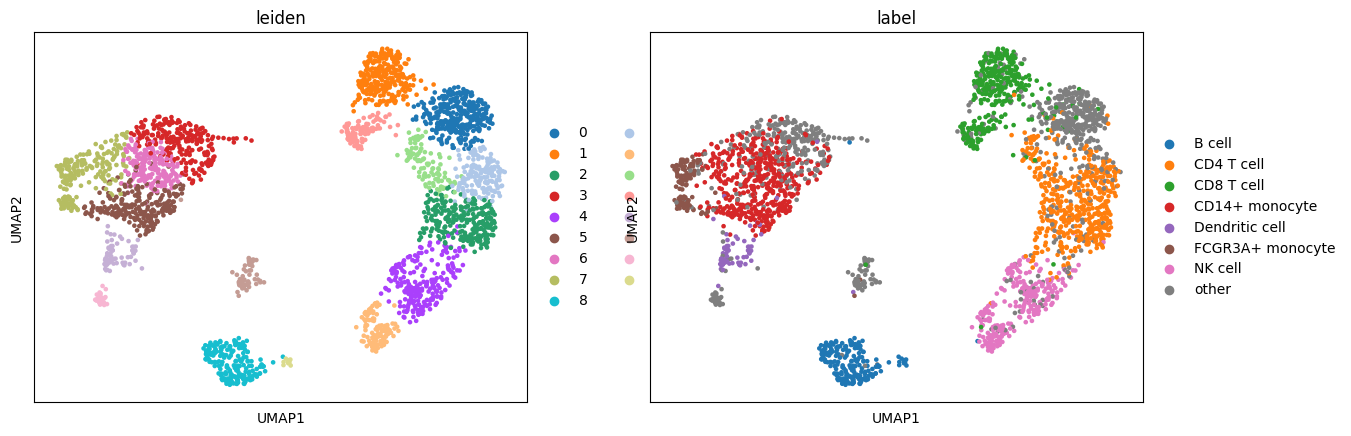

In [1]:
import anndata as ad
import sys
import scanpy as sc

#recover paper result
print(sys.path)
sys.path[0]='/home/ubuntu0/scBasset/'
path='/home/ubuntu0/scBasset'
data_path = path+'/data/multiome_pbmc/'
# ad_atac=ad.read_h5ad(path+'/atac_ad.h5ad')
ad_atac=ad.read_h5ad('/home/ubuntu0/scBasset/data/downloads/pbmc_ad.h5ad')
ad_rna=ad.read_h5ad(data_path+ '/ad_rna_annotate.h5ad')
from scbasset.utils import make_model,get_cell_embedding
model = make_model(32,ad_atac.shape[0],show_summary=False)
model.load_weights('/home/ubuntu0/scBasset/data/downloads/pbmc_model.h5')# the most trained tutorial scb model(100 epochs)
proj=get_cell_embedding(model)

ad_atac.obsm['proj']=proj
ad_atac.obs['label']=ad_rna.obs['cell_type']
sc.pp.neighbors(ad_atac,use_rep = 'proj',metric='cosine')
sc.tl.umap(ad_atac)
sc.tl.leiden(ad_atac)
sc.pl.umap(ad_atac,color=['leiden','label'])

# The clustering by cell type annotation for a locally trained scbasset model for 400 epochs
**In comparison with the plot above, we can conclude that the model trained locally resulted embedding after visualized is globally comparable to the full trained model**

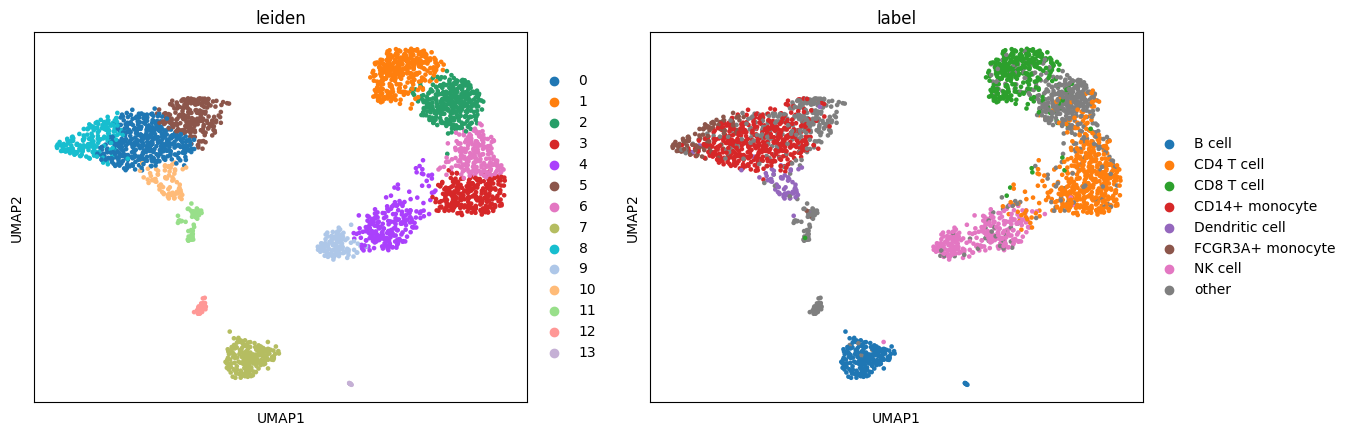

In [2]:
path='/home/ubuntu0/scBasset'
data_path = path+'/data/multiome_pbmc/'
ad_atac=ad.read_h5ad(path+'/atac_ad.h5ad')
ad_rna=ad.read_h5ad(data_path+ '/ad_rna_annotate.h5ad')
from scbasset.utils import make_model,get_cell_embedding
model = make_model(32,ad_atac.shape[0],show_summary=False)
model.load_weights('/home/ubuntu0/scBasset/output/best_model.h5')# the most trained tutorial scb model(100 epochs)
proj=get_cell_embedding(model)
ad_atac.obsm['proj']=proj
ad_atac.obs['label']=ad_rna.obs['cell_type']
sc.pp.neighbors(ad_atac,use_rep = 'proj',metric='cosine')
sc.tl.umap(ad_atac)
sc.tl.leiden(ad_atac)
sc.pl.umap(ad_atac,color=['leiden','label'])